In [80]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
import random
from keras.models import model_from_json

from tensorflow.keras.optimizers import SGD



In [2]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Activation

In [3]:
# Loading Dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))


((50000, 32, 32, 3), (50000, 1))
((10000, 32, 32, 3), (10000, 1))


In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_dict = dict({0:'airplane', 1:'automobile', 2:'bird', 3:'cat',4: 'deer', 5:'dog', 6:'frog', 7:'horse', 8:'ship', 9:'truck'})


In [5]:
num_classes = y_train[:10]
num_classes

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)    # We dont need it in 2D so we convert to 1D (We need 1st dimension so we use -1 and to flatten it we leave empty)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [8]:
def cifar_imgs(X, y , index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

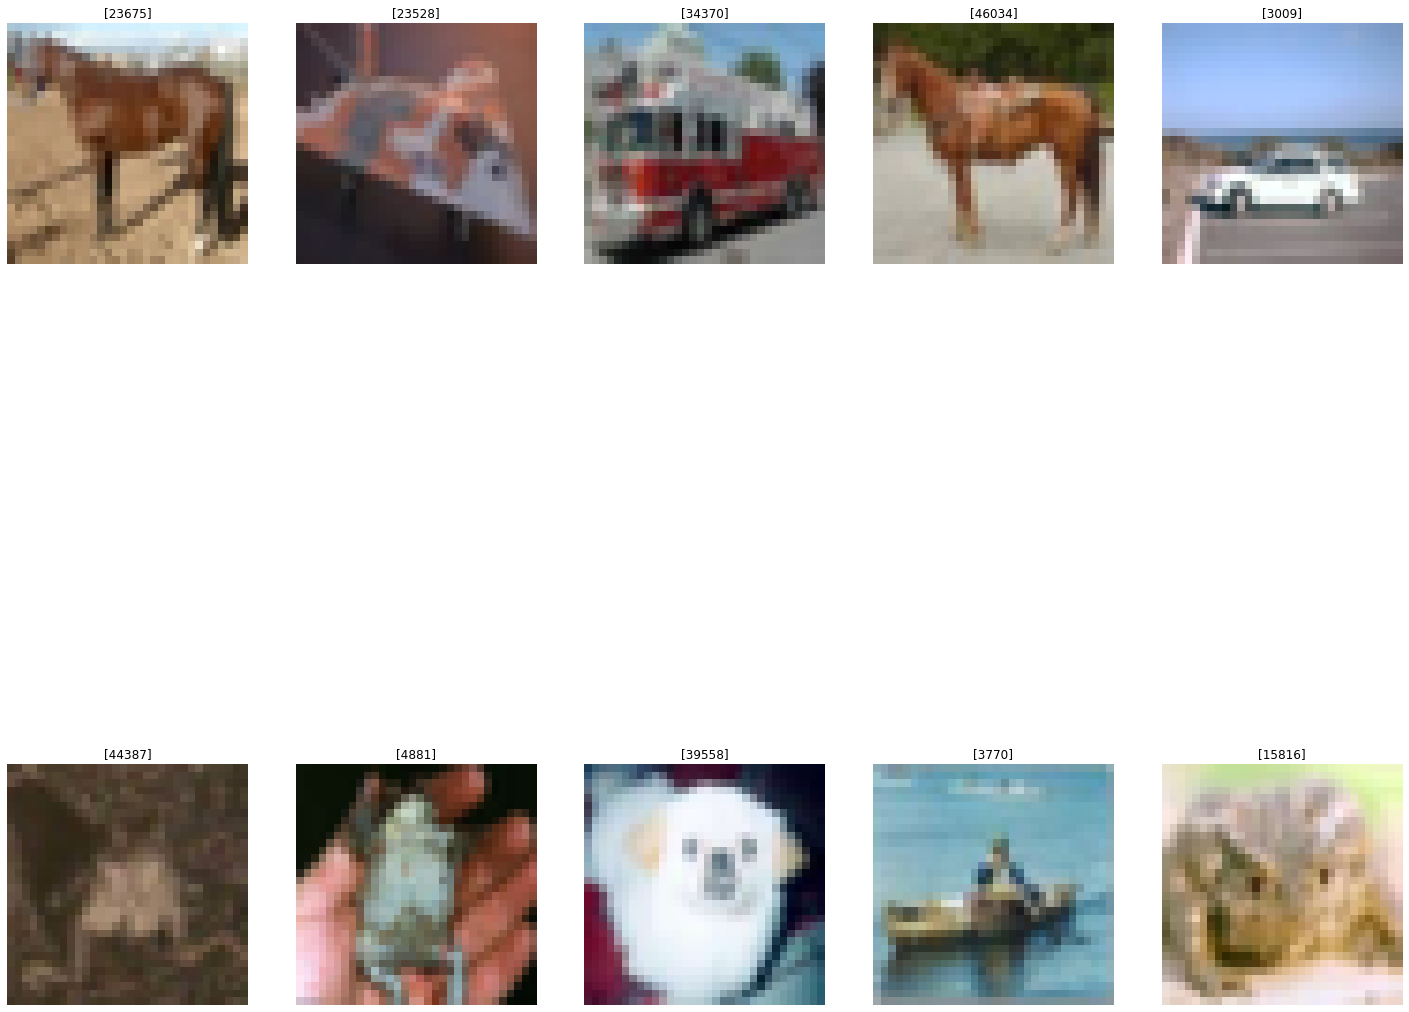

In [9]:
fig,axes = plt.subplots(2, 5, figsize=(25,25))  
axes=axes.reshape(-1)

for i in np.arange(0,2*5):   
    index=np.random.randint(0,len(X_train)) #Pick a random number 
    axes[i].imshow(X_train[index])
    axes[i].set_title([index]) #Prints labels on top of the picture
    axes[i].axis('off')
 


In [10]:
cifar_classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [11]:
y_test = y_test.reshape(-1,)


In [12]:
def cifar_imgs(X, y , index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(cifar_classes[y[index]])

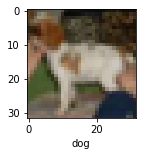

In [13]:
cifar_imgs(X_test, y_test, 12)

In [14]:
X_train[0]   # As the data is not normalized we have to narmalize it

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [15]:
# convert the data  to integer

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalizing the Data 

X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
X_train[0]    # Data is normalized

array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882353 , 0.6       , 0.13333334],
        [0.7764706 , 0

In [17]:
# Creating CNN model
# We are using 2 layers Convolution (Detecting the feature) 
#filter = detects different feature
# kerneal size = we use 3*3 filter (matrix/ box)
# Relu it give o/p 0 to 1 and impart non linearity. Ctivation fn gives o/p of the node to given input.
# Adam gives good accuracy
#
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [18]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
cnn_model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4549 - accuracy: 0.4804
Epoch 2/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1051 - accuracy: 0.6120
Epoch 3/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9809 - accuracy: 0.6599
Epoch 4/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8994 - accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8243 - accuracy: 0.7134
Epoch 6/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7729 - accuracy: 0.7307
Epoch 7/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7213 - accuracy: 0.7493
Epoch 8/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6837 - accuracy: 0.7613
Epoch 9/10
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6449 - accuracy: 0.7739
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [67]:
scores = cnn_model.evaluate(X_test, y_test, verbose = 1)
print('Accuracy : ', scores[1])


313/313 [==============================] - 1s 3ms/step - loss: 0.9388 - accuracy: 0.7026
Accuracy :  0.7026000022888184


In [ ]:
# Saving Model

In [73]:
import os
path = 'C:\\Users\\Abhijeet'
os.chdir(path)
os.getcwd()

'C:\\Users\\Abhijeet'

In [77]:
model_json = cnn_model.to_json()
with open('cnn_model.json', 'w') as json_file:
    json_file.write(model_json)

cnn_model.save_weights('model.h5')

In [82]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()


In [83]:
loaded_model = model_from_json(loaded_model_json)
print("Loaded model from disk")

# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded the model weights")
 


Loaded model from disk
Loaded the model weights


In [85]:
y_pred = loaded_model.predict(X_test)
y_actual = [np.argmax(item) for item in y_pred]


'airplane'

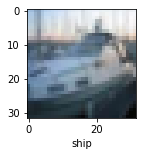

In [86]:
cifar_imgs(X_test, y_test, 2) 
classes[y_actual[2]]
